In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [68]:
df = pd.read_csv(r'C:\Users\SmartLab\Desktop\AI\Data Analasis\insurance-data.csv')

In [44]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [46]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [47]:
df.isnull()

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


In [48]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [49]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1333    False
1334    False
1335    False
1336    False
1337    False
Length: 1338, dtype: bool

In [50]:
df.duplicated().sum()

1

In [51]:
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [92]:
df=df.drop_duplicates()

In [96]:
df.duplicated().sum()

0

In [89]:
df.nunique()

age          47
sex           2
smoker        2
region        4
charges    1337
dtype: int64

In [53]:
df["sex"].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [54]:
df["region"].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [55]:
df["charges"].value_counts()

1639.56310     2
16884.92400    1
29330.98315    1
2221.56445     1
19798.05455    1
              ..
7345.08400     1
26109.32905    1
28287.89766    1
1149.39590     1
29141.36030    1
Name: charges, Length: 1337, dtype: int64

In [59]:
df['bmi'].value_counts()

32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64

In [69]:
df.drop(['bmi'], axis=1, inplace = True)
df.drop(['children'], axis=1, inplace = True)

In [70]:
df

,age,sex,smoker,region,charges
0,19,female,yes,southwest,16884.92400
1,18,male,no,southeast,1725.55230
2,28,male,no,southeast,4449.46200
3,33,male,no,northwest,21984.47061
4,32,male,no,northwest,3866.85520
...,...,...,...,...,...
1333,50,male,no,northwest,10600.54830
1334,18,female,no,northeast,2205.98080
1335,18,female,no,southeast,1629.83350
1336,21,female,no,southwest,2007.94500


In [71]:
pd.get_dummies(df)

,age,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,16884.92400,1,0,0,1,0,0,0,1
1,18,1725.55230,0,1,1,0,0,0,1,0
2,28,4449.46200,0,1,1,0,0,0,1,0
3,33,21984.47061,0,1,1,0,0,1,0,0
4,32,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,10600.54830,0,1,1,0,0,1,0,0
1334,18,2205.98080,1,0,1,0,1,0,0,0
1335,18,1629.83350,1,0,1,0,0,0,1,0
1336,21,2007.94500,1,0,1,0,0,0,0,1


In [72]:
df['age'].max()

64

In [73]:
df['charges'].max()

63770.42801

In [76]:
df['charges'].min()

1121.8739

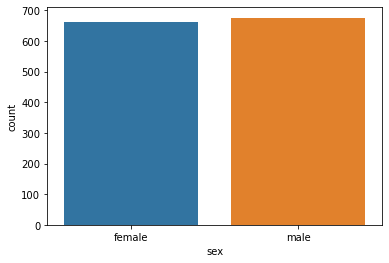

In [80]:
sns.countplot(x='sex' , data = df);

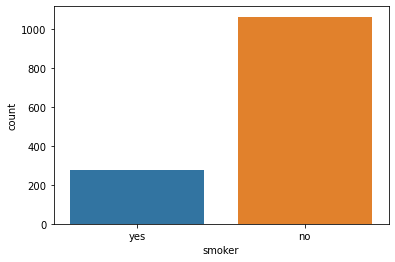

In [81]:
sns.countplot(x='smoker' , data = df);

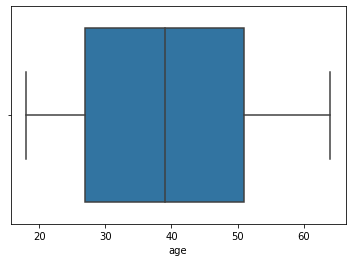

In [82]:
sns.boxplot(x='age', data=df);

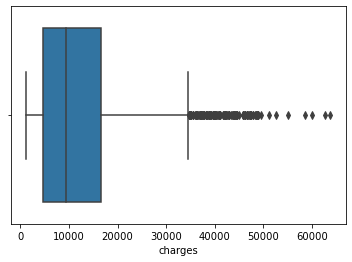

In [85]:
sns.boxplot(x='charges', data=df);

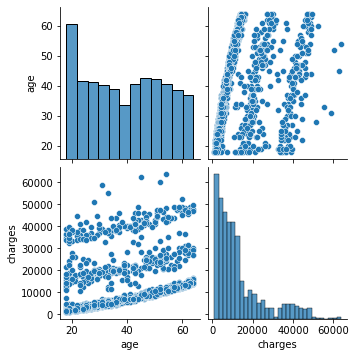

In [88]:
sns.pairplot(df);